In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation, rc
from matplotlib.animation import FuncAnimation

from IPython.display import HTML


import sys
sys.path.insert(0, '../code/')

import intcode_computer as ic

In [3]:
with open('input.txt') as inp:
    in_program = inp.read()

## Part I

In [4]:
game = ic.machine(in_program, return_output = True, verbose=False)

In [5]:
tiles = game.run()

In [6]:
tile_array = np.reshape(np.array(tiles), (len(tiles)//3, 3))

In [7]:
screen_size = (max(tile_array[:, 1])+1, max(tile_array[:, 0])+1)

In [8]:
image = np.zeros(screen_size)
for row in tile_array:
    image[row[1], row[0]] = row[2]

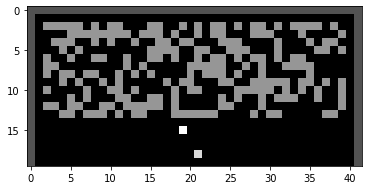

In [9]:
fig = plt.figure()
ax = plt.axes()
ax.imshow(image, interpolation='nearest', cmap=cm.Greys_r)
plt.show()

In [10]:
len(image[image == 2])

207

## Part II

In [21]:
cheat_program = '2'+in_program[1:]

In [22]:
def draw_screen(tiles, image, score):
    tile_array = np.reshape(np.array(tiles), (len(tiles)//3, 3))
    for row in tile_array:
        if row[0] == -1:
            score = row[2]
        else:
            image[row[1], row[0]] = row[2]
        
    fig = plt.figure()
    ax = plt.axes()
    ax.imshow(image, interpolation='nearest', cmap=cm.Greys_r)
    plt.show()
    print('Score: {}'.format(score))
    return image, score

In [23]:
import time
from IPython.display import clear_output

from pynput import keyboard

def on_release(key):
    global state
    global image
    global score
    clear_output(wait=True)

    game.input(state)
    tiles = game.run()
    image,score = draw_screen(tiles, image, score)
    if game.is_terminated:
        return False

def on_press(key):
    global state
    if key == keyboard.Key.esc:
        # Stop listener
        return False
    elif key == keyboard.Key.left:
        state = -1
    elif key == keyboard.Key.right:
        state = 1
    elif str(key) == "'v'":
        state = 0

## Initialize manual game

In [26]:
image = np.zeros(screen_size)
game = ic.machine(cheat_program, return_output = True, reset_outputs=True, verbose=False, inputs=[])
tiles = game.run()

## Play manual game

- Press v to move ball without moving paddle
- Move paddle with left or right

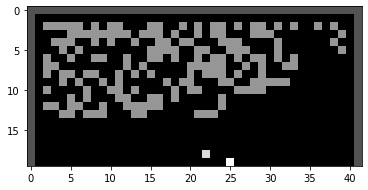

Score: 0


In [27]:
state = 0
changed = False
image,score = draw_screen(tiles, image, score=0)

listener = keyboard.Listener(on_press=on_press, on_release=on_release)
listener.start()

## Computer player

In [41]:
def draw_screen(tiles, image, score, paddle_x=None, ball_x=None, show_game=True):
    tile_array = np.reshape(np.array(tiles), (len(tiles)//3, 3))
    for row in tile_array:
        if row[0] == -1:
            score = row[2]
        else:
            image[row[1], row[0]] = row[2]
        
        if row[2] == 3:
            paddle_x = row[0]
        elif row[2] == 4:
            ball_x = row[0]
    if show_game:
        fig = plt.figure()
        ax = plt.axes()
        ax.imshow(image, interpolation='nearest', cmap=cm.Greys_r)
        plt.show()
        print('Score: {}'.format(score))
    
    return image, score, paddle_x, ball_x

In [42]:
def make_decision(paddle_x, ball_x):
    if ball_x == paddle_x:
        return 0
    elif ball_x > paddle_x:
        return 1
    elif ball_x < paddle_x:
        return -1

In [44]:
image = np.zeros(screen_size)
game = ic.machine(cheat_program, return_output = True, reset_outputs=True, verbose=False, inputs=[])
tiles = game.run()

show_game = False

image,score,paddle_x,ball_x = draw_screen(tiles, image, score=0, show_game=show_game)

state = 0
while True:
    
    if show_game:
        time.sleep(0.001)
        clear_output(wait=True)
    
    state = make_decision(paddle_x, ball_x)
    
    game.input(state)
    tiles = game.run()
    image,score,paddle_x,ball_x = draw_screen(tiles, image, score, paddle_x, ball_x, show_game=show_game)
    
    if game.is_terminated:
        break
    elif len(image[image == 2]) == 0:
        break

print(score)
    

10247
